# Deep Bidirectional RNN

Objetivo: Comprender las RNN Bidireccionales y sus efectos en el aprendizaje del modelo. Conocer el comportamiento de los optimizadores en modelos recurrentes.

In [1]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Embedding, Dense, SimpleRNN, Bidirectional
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential

from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

# Reseñas de películas de IMDB

- Conjunto de datos de 25,000 críticas de películas de IMDB, etiquetadas por sentimiento (positivo / negativo).

In [2]:
# numero de palabras
num_words = 4000

max_len = 100


#dimensión embedding
emb_dim = 64


(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)


x_train = pad_sequences(x_train, maxlen=max_len, padding = 'post')
x_test = pad_sequences(x_test, maxlen=max_len, padding = 'post')

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(25000, 100)
(25000, 100)
(25000,)
(25000,)


In [3]:
epoch = 4
verbose = 1
batch = 30

## Cada palabra de la review esta identificada por un número

In [4]:
print('Reseña')
print(x_train[0])
print('Etiqueta')
print(y_train[0])

Reseña
[1415   33    6   22   12  215   28   77   52    5   14  407   16   82
    2    8    4  107  117    2   15  256    4    2    7 3766    5  723
   36   71   43  530  476   26  400  317   46    7    4    2 1029   13
  104   88    4  381   15  297   98   32 2071   56   26  141    6  194
    2   18    4  226   22   21  134  476   26  480    5  144   30    2
   18   51   36   28  224   92   25  104    4  226   65   16   38 1334
   88   12   16  283    5   16    2  113  103   32   15   16    2   19
  178   32]
Etiqueta
1


## Palabras de reseña

In [5]:
wordDict = {y:x for x,y in imdb.get_word_index().items()}  
res = []
for index in x_train[0]:
    res.append(wordDict.get(index - 3))
print('Reseña: ',res,'Longitud reseña: ', len(res))

Reseña:  ['cry', 'at', 'a', 'film', 'it', 'must', 'have', 'been', 'good', 'and', 'this', 'definitely', 'was', 'also', None, 'to', 'the', 'two', 'little', None, 'that', 'played', 'the', None, 'of', 'norman', 'and', 'paul', 'they', 'were', 'just', 'brilliant', 'children', 'are', 'often', 'left', 'out', 'of', 'the', None, 'list', 'i', 'think', 'because', 'the', 'stars', 'that', 'play', 'them', 'all', 'grown', 'up', 'are', 'such', 'a', 'big', None, 'for', 'the', 'whole', 'film', 'but', 'these', 'children', 'are', 'amazing', 'and', 'should', 'be', None, 'for', 'what', 'they', 'have', 'done', "don't", 'you', 'think', 'the', 'whole', 'story', 'was', 'so', 'lovely', 'because', 'it', 'was', 'true', 'and', 'was', None, 'life', 'after', 'all', 'that', 'was', None, 'with', 'us', 'all'] Longitud reseña:  100


## Deep RNN
- Se compara el modelo con y sin regularización


In [6]:
def deep_lstm():
    model = Sequential()
    model.add(Embedding(num_words, emb_dim))
    model.add(LSTM(64, return_sequences = True))
    model.add(LSTM(64, return_sequences = False))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [7]:
model = deep_lstm()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          256000    
_________________________________________________________________
lstm (LSTM)                  (None, None, 64)          33024     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [8]:
history = model.fit(x_train, y_train, batch_size = batch, validation_split = 0.3, 
                    epochs = epoch, verbose = verbose)

Train on 17500 samples, validate on 7500 samples
Epoch 1/4
17500/17500 [==============================] - 13s 729us/sample - loss: 0.4694 - accuracy: 0.7726 - val_loss: 0.3721 - val_accuracy: 0.8356
Epoch 2/4
17500/17500 [==============================] - 8s 468us/sample - loss: 0.3294 - accuracy: 0.8625 - val_loss: 0.3963 - val_accuracy: 0.8260
Epoch 3/4
17500/17500 [==============================] - 8s 473us/sample - loss: 0.2651 - accuracy: 0.8971 - val_loss: 0.3729 - val_accuracy: 0.8404
Epoch 4/4
17500/17500 [==============================] - 8s 441us/sample - loss: 0.2223 - accuracy: 0.9161 - val_loss: 0.4021 - val_accuracy: 0.8407


In [9]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest acccuracy:', test_acc)

25000/1 - 4s - loss: 0.5023 - accuracy: 0.8368

Test acccuracy: 0.8368


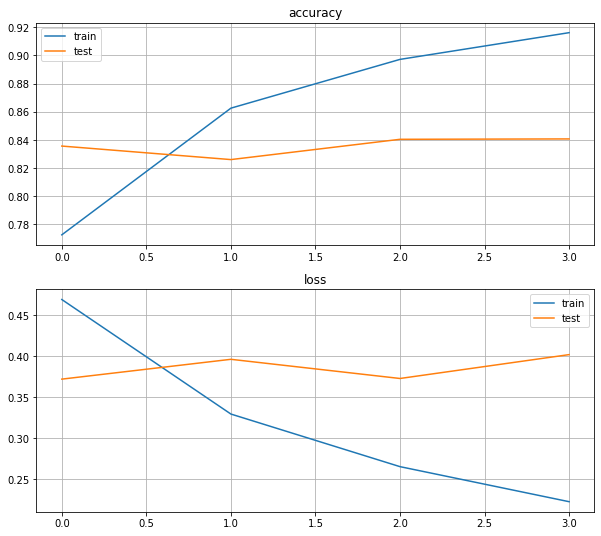

In [10]:
plt.figure(figsize=(10,9))

plt.subplot(211)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.legend(['train', 'test'])
plt.grid()
plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.legend(['train', 'test'])
plt.grid()

## Bidirectional RNN
- Bidirectional RNNs lee las secuencias en ambas direcciones



In [11]:
def bidirectional_lstm():
    
    model = Sequential()
    model.add(Embedding(num_words, emb_dim))
    model.add(Bidirectional(LSTM(64, return_sequences = False))) 
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [12]:
model = bidirectional_lstm()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          256000    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 322,177
Trainable params: 322,177
Non-trainable params: 0
_________________________________________________________________


In [13]:
history = model.fit(x_train, y_train, batch_size = batch, validation_split = 0.3, 
                    epochs = epoch, verbose = verbose)

Train on 17500 samples, validate on 7500 samples
Epoch 1/4
17500/17500 [==============================] - 11s 636us/sample - loss: 0.4474 - accuracy: 0.7817 - val_loss: 0.3473 - val_accuracy: 0.8480
Epoch 2/4
17500/17500 [==============================] - 8s 459us/sample - loss: 0.2988 - accuracy: 0.8778 - val_loss: 0.3671 - val_accuracy: 0.8377
Epoch 3/4
17500/17500 [==============================] - 8s 470us/sample - loss: 0.2477 - accuracy: 0.8997 - val_loss: 0.3638 - val_accuracy: 0.8356
Epoch 4/4
17500/17500 [==============================] - 8s 468us/sample - loss: 0.1998 - accuracy: 0.9220 - val_loss: 0.4619 - val_accuracy: 0.8167


In [14]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest acccuracy:', test_acc)

25000/1 - 4s - loss: 0.6446 - accuracy: 0.8137

Test acccuracy: 0.81368


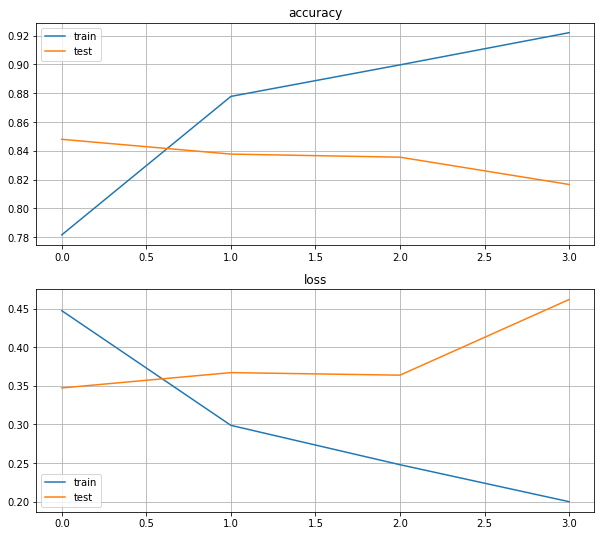

In [15]:
plt.figure(figsize=(10,9))

plt.subplot(211)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.legend(['train', 'test'])
plt.grid()
plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.legend(['train', 'test'])
plt.grid()

## Deep Bidirectional RNN
- Observar el efecto de la profundidad de la red en el entrenamiento

In [16]:
def deep_bidirectional_lstm():
    model = Sequential()
    model.add(Embedding(num_words, emb_dim))
    model.add(Bidirectional(LSTM(64, return_sequences = True))) 
    model.add(Bidirectional(LSTM(64, return_sequences = False))) 
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [17]:
model = deep_bidirectional_lstm()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 64)          256000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, None, 128)         66048     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 128)               98816     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 420,993
Trainable params: 420,993
Non-trainable params: 0
_________________________________________________________________


In [18]:
history1 = model.fit(x_train, y_train, batch_size = batch, validation_split = 0.3, 
                    epochs = epoch, verbose = verbose)

Train on 17500 samples, validate on 7500 samples
Epoch 1/4
17500/17500 [==============================] - 19s 1ms/sample - loss: 0.4360 - accuracy: 0.7903 - val_loss: 0.3841 - val_accuracy: 0.8337
Epoch 2/4
17500/17500 [==============================] - 14s 798us/sample - loss: 0.2995 - accuracy: 0.8735 - val_loss: 0.3486 - val_accuracy: 0.8423
Epoch 3/4
17500/17500 [==============================] - 14s 773us/sample - loss: 0.2407 - accuracy: 0.9041 - val_loss: 0.3928 - val_accuracy: 0.8413
Epoch 4/4
17500/17500 [==============================] - 14s 784us/sample - loss: 0.1764 - accuracy: 0.9350 - val_loss: 0.4313 - val_accuracy: 0.8397


In [19]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest acccuracy:', test_acc)

25000/1 - 7s - loss: 0.4300 - accuracy: 0.8369

Test acccuracy: 0.83688


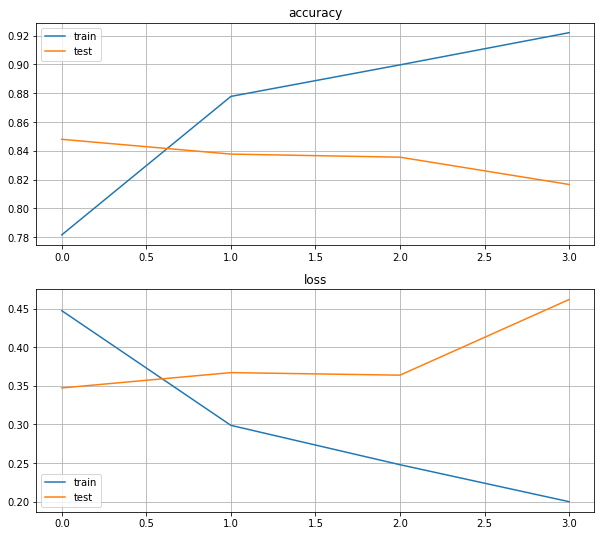

In [20]:
plt.figure(figsize=(10,9))

plt.subplot(211)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.legend(['train', 'test'])
plt.grid()
plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.legend(['train', 'test'])
plt.grid()

## Optimización en Bidirectional RNN con regularización

- Los optimizadores tienen comportamientos diferentes en las diferentes arquitecturas de las redes
- La regularización como dropout se agrega con 'recurrent_dropout'

In [21]:
def deep_bidirectional_lstm():
    model = Sequential()
    model.add(Embedding(num_words, emb_dim))
    model.add(Bidirectional(LSTM(64, return_sequences = True, 
                                 recurrent_initializer='glorot_uniform',
                                 recurrent_dropout=0.1))) 
    model.add(Bidirectional(LSTM(64, return_sequences = False,
                                 recurrent_initializer='glorot_uniform',
                                 recurrent_dropout=0.1))) 
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    
    return model

In [22]:
model = deep_bidirectional_lstm()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 64)          256000    
_________________________________________________________________
bidirectional_3 (Bidirection (None, None, 128)         66048     
_________________________________________________________________
bidirectional_4 (Bidirection (None, 128)               98816     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 420,993
Trainable params: 420,993
Non-trainable params: 0
_________________________________________________________________


In [23]:
history2 = model.fit(x_train, y_train, batch_size = batch, validation_split = 0.3, 
                    epochs = epoch, verbose = verbose)

Train on 17500 samples, validate on 7500 samples
Epoch 1/4
17500/17500 [==============================] - 156s 9ms/sample - loss: 0.4587 - accuracy: 0.7790 - val_loss: 0.3586 - val_accuracy: 0.8437
Epoch 2/4
17500/17500 [==============================] - 148s 8ms/sample - loss: 0.3404 - accuracy: 0.8582 - val_loss: 0.3572 - val_accuracy: 0.8476
Epoch 3/4
17500/17500 [==============================] - 150s 9ms/sample - loss: 0.2987 - accuracy: 0.8794 - val_loss: 0.4286 - val_accuracy: 0.7911
Epoch 4/4
17500/17500 [==============================] - 154s 9ms/sample - loss: 0.2658 - accuracy: 0.8933 - val_loss: 0.3406 - val_accuracy: 0.8543


In [24]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest acccuracy:', test_acc)

25000/1 - 58s - loss: 0.4047 - accuracy: 0.8495

Test acccuracy: 0.84952


- RMSProp con regularización supera a las redes anteriores con Adam 
- Averiguar si quitando la regularizacón se llega a el mismo resultado

In [25]:
def deep_bidirectional_lstm():
    model = Sequential()
    model.add(Embedding(num_words, emb_dim))
    model.add(Bidirectional(LSTM(64, return_sequences = True, 
                                 recurrent_initializer='glorot_uniform',
                                 recurrent_dropout=0.1))) 
    model.add(Bidirectional(LSTM(64, return_sequences = False,
                                 recurrent_initializer='glorot_uniform',
                                 recurrent_dropout=0.1))) 
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [26]:
model = deep_bidirectional_lstm()
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 64)          256000    
_________________________________________________________________
bidirectional_5 (Bidirection (None, None, 128)         66048     
_________________________________________________________________
bidirectional_6 (Bidirection (None, 128)               98816     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 129       
Total params: 420,993
Trainable params: 420,993
Non-trainable params: 0
_________________________________________________________________


In [27]:
history3 = model.fit(x_train, y_train, batch_size = batch, validation_split = 0.3, 
                    epochs = epoch, verbose = verbose)

Train on 17500 samples, validate on 7500 samples
Epoch 1/4
17500/17500 [==============================] - 154s 9ms/sample - loss: 0.4406 - accuracy: 0.7915 - val_loss: 0.3548 - val_accuracy: 0.8440
Epoch 2/4
17500/17500 [==============================] - 148s 8ms/sample - loss: 0.3120 - accuracy: 0.8707 - val_loss: 0.3460 - val_accuracy: 0.8472
Epoch 3/4
17500/17500 [==============================] - 146s 8ms/sample - loss: 0.2529 - accuracy: 0.8973 - val_loss: 0.3682 - val_accuracy: 0.8375
Epoch 4/4
17500/17500 [==============================] - 147s 8ms/sample - loss: 0.2028 - accuracy: 0.9210 - val_loss: 0.4140 - val_accuracy: 0.8339


In [28]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest acccuracy:', test_acc)

25000/1 - 58s - loss: 0.3618 - accuracy: 0.8309

Test acccuracy: 0.83092


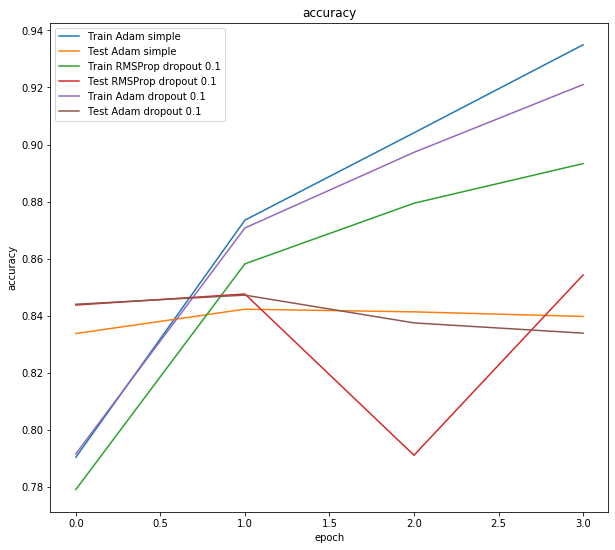

In [29]:
# plot
plt.figure(figsize=(10,9))
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])


plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])

plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])


plt.legend(['Train Adam simple', 'Test Adam simple',
            'Train RMSProp dropout 0.1', 'Test RMSProp dropout 0.1',
            'Train Adam dropout 0.1', 'Test Adam dropout 0.1',])

plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.show()


- Mejorar el acuracy de la red
- Probar Deep-Bidirectional-RNN con otro dataset
- Probar con otros optimizadores y diferentes valores de 'recurrent_dropout' y 'recurrent_initializer' 